# Introduction
Here, select one of the six darts and create a simulation to throw the darts. Even if it is called a simulation, it is not a video, but creates something like the following.

What you need to pay attention to is how to express the act of choosing a dart's mat and the place where a dart's arrow is stuck by programming.


You will also learn about probability distributions and dictionaries by implementing dart throwing.

In [2]:
# predefines and imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

# Problem 1
## Choose dart mat

In [3]:
def mat_choice(mat_count = 6):
    return np.random.choice(mat_count) + 1
def problem1():
    mat = mat_choice()
    print(f'Dart mat chossen: {mat}')
    return mat
problem1_mat_choice = problem1()

Dart mat chossen: 6


# Problem 2
## Throwing Dart

In [4]:
def problem2():
    norm = [problem1_mat_choice,0]
    cov = [[0.01,0],[0,0.01]]
    darts = np.random.multivariate_normal(norm,cov,10)
    print(f'Darts with mean as the center of mat {problem1_mat_choice}: \n {darts}')
problem2()

Darts with mean as the center of mat 6: 
 [[ 6.21191541e+00  7.04252248e-02]
 [ 6.04681688e+00 -3.70496525e-03]
 [ 6.10379888e+00  3.13215622e-02]
 [ 6.02391304e+00 -5.54247486e-02]
 [ 6.02240381e+00  1.53214085e-01]
 [ 6.01707529e+00 -9.25876862e-02]
 [ 5.98160210e+00  2.36165513e-01]
 [ 6.11912023e+00  6.08927888e-02]
 [ 6.05375877e+00 -8.08710389e-02]
 [ 6.04679840e+00  4.70028012e-02]]


# Problem 3
## Throw dart and store location

In [5]:
def problem3():
    repetitions = 1000
    cov = [[0.01,0],[0,0.01]]
    dart_throws = dict()
    for i in range(repetitions):
        mat = mat_choice()
        norm = [mat,0]
        dart = np.random.multivariate_normal(norm,cov)
        dart_throws[i] = np.append(dart,[mat])
        # dart_throws[i] = dart

    print(f'Example element of dictionary: {dart_throws[1]}')
    return dart_throws
problem3_throws = problem3()

Example element of dictionary: [2.8951533  0.22022154 3.        ]


# Problem 4
## Visualize

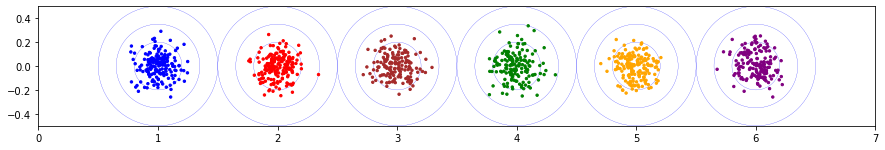

In [6]:
def color(mat):
    if mat == 1: return 'blue'
    if mat == 2: return 'red'
    if mat == 3: return 'brown'
    if mat == 4: return 'green'
    if mat == 5: return 'orange'
    if mat == 6: return 'purple'
def problem4():
    fig, axis = plt.subplots()

    for i in range(1,7):   
        circle1 = patches.Circle((i,0), 0.2, fill = False,ec = 'blue',lw = '0.2')
        circle2 = patches.Circle((i,0), 0.35, fill = False,ec = 'blue',lw = '0.2')
        circle3 = patches.Circle((i,0), 0.5, fill = False,ec = 'blue',lw = '0.2')
        axis.add_patch(circle1)
        axis.add_patch(circle2)
        axis.add_patch(circle3)

    for i in range(1000):
        x,y,mat = problem3_throws[i]
        dot = patches.Circle((x,y),radius=0.01, color = color(mat))
        axis.add_patch(dot)

    fig.set_figwidth(15)
    axis.set_xlim(0,7)
    axis.set_ylim(-0.5,0.5)
    axis.set_aspect(1.0)
problem4()

# Problem 5
## Functionalization

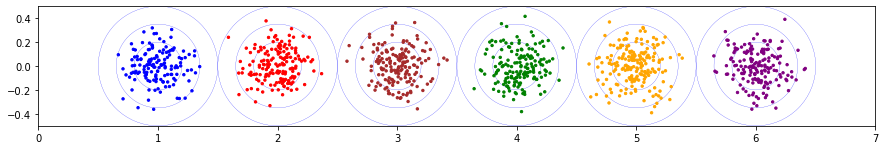

In [9]:
def throw_darts(mat_count = 6, n = 1000, cov = [[0.01,0],[0,0.01]]):
    result = dict()
    for i in range(n):
        mat = mat_choice(mat_count)
        dart = np.random.multivariate_normal([mat,0],cov)
        result[i] = np.append(dart, mat)
    return result
def graph_thrown_dart(darts, mat_count = 6):
    fig, axis = plt.subplots()

    for i in range(1,mat_count + 1):   
        circle1 = patches.Circle((i,0), 0.2, fill = False,ec = 'blue',lw = '0.2')
        circle2 = patches.Circle((i,0), 0.35, fill = False,ec = 'blue',lw = '0.2')
        circle3 = patches.Circle((i,0), 0.5, fill = False,ec = 'blue',lw = '0.2')
        axis.add_patch(circle1)
        axis.add_patch(circle2)
        axis.add_patch(circle3)

    for i in range(1000):
        x,y,mat = darts[i]
        dot = patches.Circle((x,y),radius=0.01, color = color(mat))
        axis.add_patch(dot)

    fig.set_figwidth(15)
    axis.set_xlim(0,7)
    axis.set_ylim(-0.5,0.5)
    axis.set_aspect(1.0)
def throw_n_graph(mat_count = 6, n = 1000, cov = [[0.01,0],[0,0.01]]):
    darts = throw_darts(mat_count, n,cov)
    graph_thrown_dart(darts, mat_count)
def problem5():
    throw_n_graph(n=1000000, cov = [[0.02,0],[0,0.02]])
problem5()

### Note: problem 6
- I think i misunderstood the problem's requirement 